Se tiene información diaria de la cotización de acciones en el NYSE en el archivo nyse_daily.csv en el siguiente formato (symbol, date, open, measure_midday, measure_afternoon, close, volume). Por cada acción cuyo nombre está indicado en el campo symbol, tendremos una entrada por fecha con los valores open, measure_midday, measure_afternoon, y close indicando respectivamente a qué valor abrio la acción, cuál fue el valor que tuvo al mediodía, cual fue su valor que tuvo por la tarde y cual fue su valor al cierre del mercado. Asimismo en volume se indica el volumen operado ese día para esa acción. Por otro lado se cuenta con el archivo s&p500.csv de formato (symbol, company_name) que indica aquellas acciones que deben ser consideradas para calcular el índice Standard & Poor’s 500 (S&P 500).

Se pide calcular el valor diario del índice S&P 500, teniendo en cuenta que el mismo se calcula como el promedio del valor promedio de las mediciones que tuvo cada acción ese día (open, measure_midday, measure_afternoon, close), para las 500 acciones que se encuentran en el archivo s&p500.csv. El resultado debe estar en un dataframe de la forma (date, index_name, value). Por ejemplo, una entrada del mismo sería (‘2019-03-24’, ‘SP500’, ‘35.46’).

Nota: A los efectos prácticos del ejercicio consideraremos como estadísticamente significativo calcular el promedio con esas pocas mediciones.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sp=pd.read_csv('s&p500.csv')
sp.head()

,symbol,Company Name
0,AAPL,Apple
1,GOOGL,Google
2,MSFT,Microsoft
3,AMZN,Amazon
4,FB,Facebook


In [4]:
nyse = pd.read_csv('nyse.csv')
nyse.head()

,Symbol,Date,Open,High,Low,Close,Volume,Name
0,0,2006-01-03,61.07,61.85,61.05,61.63,10703200,FB
1,1,2006-01-04,61.93,62.64,61.76,62.58,9068100,FB
2,2,2006-01-05,62.57,62.95,62.10,62.32,9852600,FB
3,3,2006-01-06,62.36,62.74,62.14,62.60,5919300,FB
4,4,2006-01-09,62.52,63.01,62.43,62.99,7103700,FB


In [5]:
data = nyse.merge(sp, right_on='symbol', left_on='Name', how = 'inner')
data.head()

,Symbol,Date,Open,High,Low,Close,Volume,Name,symbol,Company Name
0,0,2006-01-03,61.07,61.85,61.05,61.63,10703200,FB,FB,Facebook
1,1,2006-01-04,61.93,62.64,61.76,62.58,9068100,FB,FB,Facebook
2,2,2006-01-05,62.57,62.95,62.10,62.32,9852600,FB,FB,Facebook
3,3,2006-01-06,62.36,62.74,62.14,62.60,5919300,FB,FB,Facebook
4,4,2006-01-09,62.52,63.01,62.43,62.99,7103700,FB,FB,Facebook


In [6]:
dataCopy = data.copy()
data['promedio_acciones'] = (data['Open']+data['High']+data['Low']+data['Close'])/4
data

,Symbol,Date,Open,High,Low,Close,Volume,Name,symbol,Company Name,promedio_acciones
0,0,2006-01-03,61.07,61.85,61.05,61.63,10703200,FB,FB,Facebook,61.4000
1,1,2006-01-04,61.93,62.64,61.76,62.58,9068100,FB,FB,Facebook,62.2275
2,2,2006-01-05,62.57,62.95,62.10,62.32,9852600,FB,FB,Facebook,62.4850
3,3,2006-01-06,62.36,62.74,62.14,62.60,5919300,FB,FB,Facebook,62.4600
4,4,2006-01-09,62.52,63.01,62.43,62.99,7103700,FB,FB,Facebook,62.7375
...,...,...,...,...,...,...,...,...,...,...,...
25183,90588,2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN,AMZN,Amazon,1170.7225
25184,90589,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN,AMZN,Amazon,1170.9975
25185,90590,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN,AMZN,Amazon,1181.2675
25186,90591,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN,AMZN,Amazon,1187.3950


In [7]:
data = data.groupby('Date').agg({'promedio_acciones':'mean'}).reset_index()
data['index_name'] = 'S&P500'
data

,Date,promedio_acciones,index_name
0,2006-01-03,73.157222,S&P500
1,2006-01-04,75.218056,S&P500
2,2006-01-05,75.648889,S&P500
3,2006-01-06,77.292778,S&P500
4,2006-01-09,77.703056,S&P500
...,...,...,...
3014,2017-12-22,625.136250,S&P500
3015,2017-12-26,623.110625,S&P500
3016,2017-12-27,625.141875,S&P500
3017,2017-12-28,625.844375,S&P500


Con la información provista en el punto1, realizar una visualización en la que pueda comparar de forma diaria 
las cotizaciones de las acciones de símbolo AMZN, GOOG, FB. Además indicar en la visualización para cada acción
en cada dia, si cerro a la alza o a la baja (si el valor para ese dia con el que abrió la acción es mayor al 
de cierre se dice que cerró a la alza. En caso contrario, a la baja).
¿Cómo podría agregar el índice calculado en el punto1 a la visualización para comparar el desempeño de esas 
acciones contra el índice S&P500?

In [10]:
#1ro filtro las acciones de simbolo AMZN, GOOG y FB y mergeo con S&P
new_df = nyse[(nyse['Name'] == 'AMZN') | (nyse['Name'] == 'GOOGL') | (nyse['Name'] == 'FB')]
data = new_df.merge(sp, right_on='symbol', left_on='Name', how = 'inner')
#filtro un mes random (decision personal)
data = data[(data['Date']<='2017-01-31') & (data['Date']>='2017-01-01')]
data

,Symbol,Date,Open,High,Low,Close,Volume,Name,symbol,Company Name
2800,2768,2017-01-03,800.62,811.44,796.89,808.01,1959033,GOOGL,GOOGL,Google
2801,2769,2017-01-04,809.89,813.43,804.11,807.77,1515339,GOOGL,GOOGL,Google
2802,2770,2017-01-05,807.50,813.74,805.92,813.02,1340535,GOOGL,GOOGL,Google
2803,2771,2017-01-06,814.99,828.96,811.50,825.21,2017097,GOOGL,GOOGL,Google
2804,2772,2017-01-09,826.37,830.43,821.62,827.18,1408924,GOOGL,GOOGL,Google
...,...,...,...,...,...,...,...,...,...,...
12374,90357,2017-01-25,825.79,837.42,825.29,836.52,4023078,AMZN,AMZN,Amazon
12375,90358,2017-01-26,835.53,843.84,833.00,839.15,3586323,AMZN,AMZN,Amazon
12376,90359,2017-01-27,839.00,839.70,829.44,835.77,2998700,AMZN,AMZN,Amazon
12377,90360,2017-01-30,833.00,833.50,816.38,830.38,3747336,AMZN,AMZN,Amazon


In [11]:
#Hago lo mismo que antes para calcular promedios
data['promedio_acciones'] = (data['Open']+data['High']+data['Low']+data['Close'])/4
#data = data.groupby('Date').agg({'promedio_acciones':'mean'}).reset_index()
data['index_name'] = 'S&P500'
data['day'] = pd.to_datetime(data['Date']).dt.day
data

,Symbol,Date,Open,High,Low,Close,Volume,Name,symbol,Company Name,promedio_acciones,index_name,day
2800,2768,2017-01-03,800.62,811.44,796.89,808.01,1959033,GOOGL,GOOGL,Google,804.2400,S&P500,3
2801,2769,2017-01-04,809.89,813.43,804.11,807.77,1515339,GOOGL,GOOGL,Google,808.8000,S&P500,4
2802,2770,2017-01-05,807.50,813.74,805.92,813.02,1340535,GOOGL,GOOGL,Google,810.0450,S&P500,5
2803,2771,2017-01-06,814.99,828.96,811.50,825.21,2017097,GOOGL,GOOGL,Google,820.1650,S&P500,6
2804,2772,2017-01-09,826.37,830.43,821.62,827.18,1408924,GOOGL,GOOGL,Google,826.4000,S&P500,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,90357,2017-01-25,825.79,837.42,825.29,836.52,4023078,AMZN,AMZN,Amazon,831.2550,S&P500,25
12375,90358,2017-01-26,835.53,843.84,833.00,839.15,3586323,AMZN,AMZN,Amazon,837.8800,S&P500,26
12376,90359,2017-01-27,839.00,839.70,829.44,835.77,2998700,AMZN,AMZN,Amazon,835.9775,S&P500,27
12377,90360,2017-01-30,833.00,833.50,816.38,830.38,3747336,AMZN,AMZN,Amazon,828.3150,S&P500,30


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

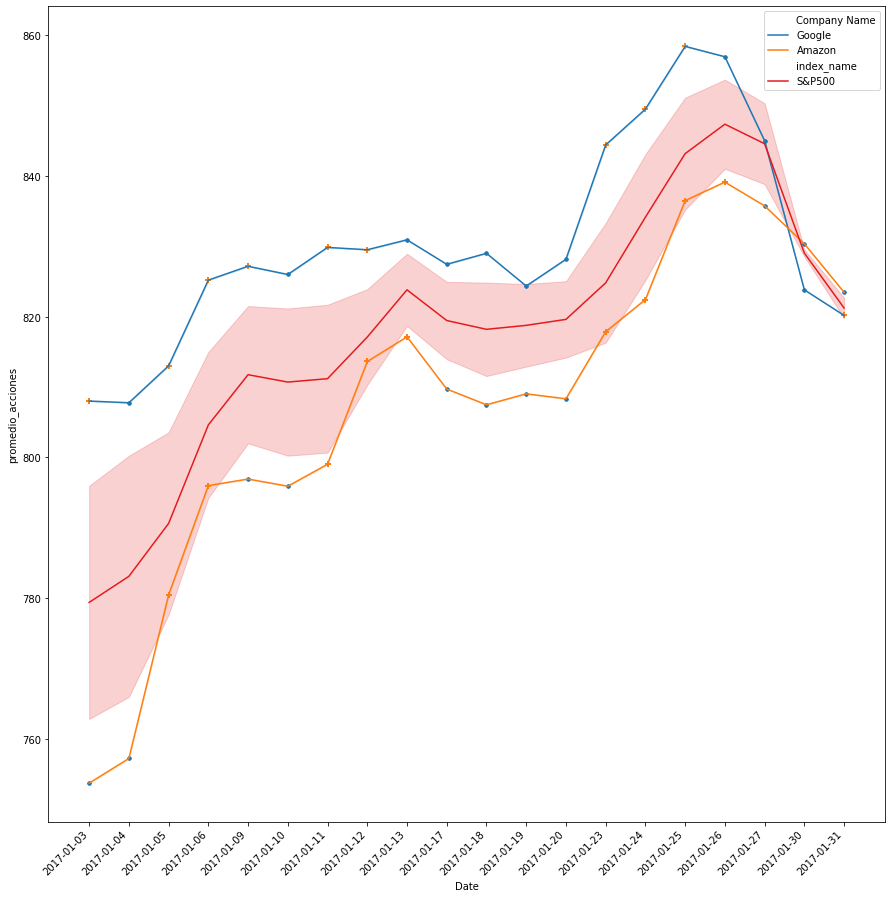

In [35]:
plt.figure(figsize=(15,15))
ax = sns.lineplot(x="Date", y="Close", hue="Company Name", data=data)
sns.lineplot(x="Date", y="promedio_acciones", hue="index_name", data=data, palette='Set1')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.scatter(data[(data.Open >= data.Close)]['Date'].tolist(),
            data[(data.Open >= data.Close)]['Close'].tolist(),
            marker='.')
plt.scatter(data[(data.Open < data.Close)]['Date'].tolist(),
            data[(data.Open < data.Close)]['Close'].tolist(),
            marker='+')
plt.xticks(rotation=45,horizontalalignment='right')

In [ ]:
plt.figure(figsize=(15,4))
